In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [30]:
df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [29]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [32]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [33]:
(df.isnull().sum()/len(df))


beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.172123
lot_size_units    0.172123
zip_code          0.000000
price             0.000000
dtype: float64

In [35]:
df = df.dropna()

In [36]:
(df.isnull().sum()/len(df))

beds              0.0
baths             0.0
size              0.0
size_units        0.0
lot_size          0.0
lot_size_units    0.0
zip_code          0.0
price             0.0
dtype: float64

In [37]:
df = df.drop('size_units', axis = 1)

<Axes: >

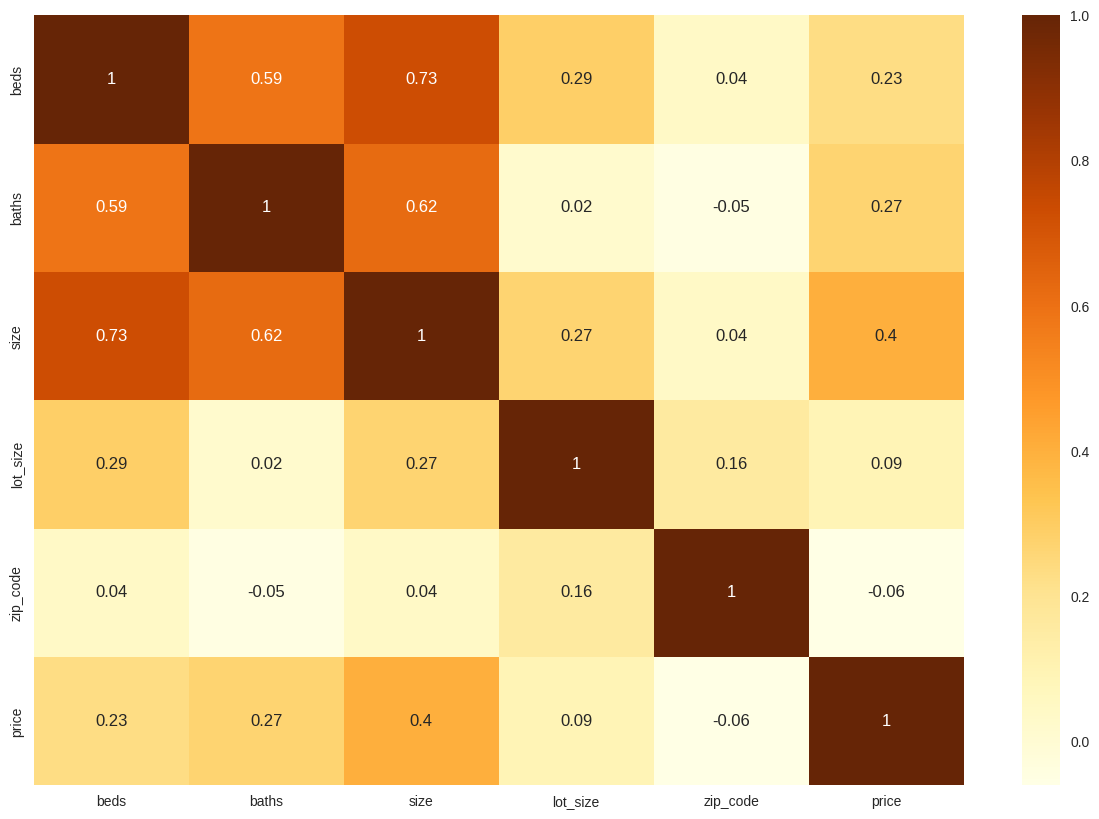

In [39]:
correl = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

<Axes: xlabel='price', ylabel='Count'>

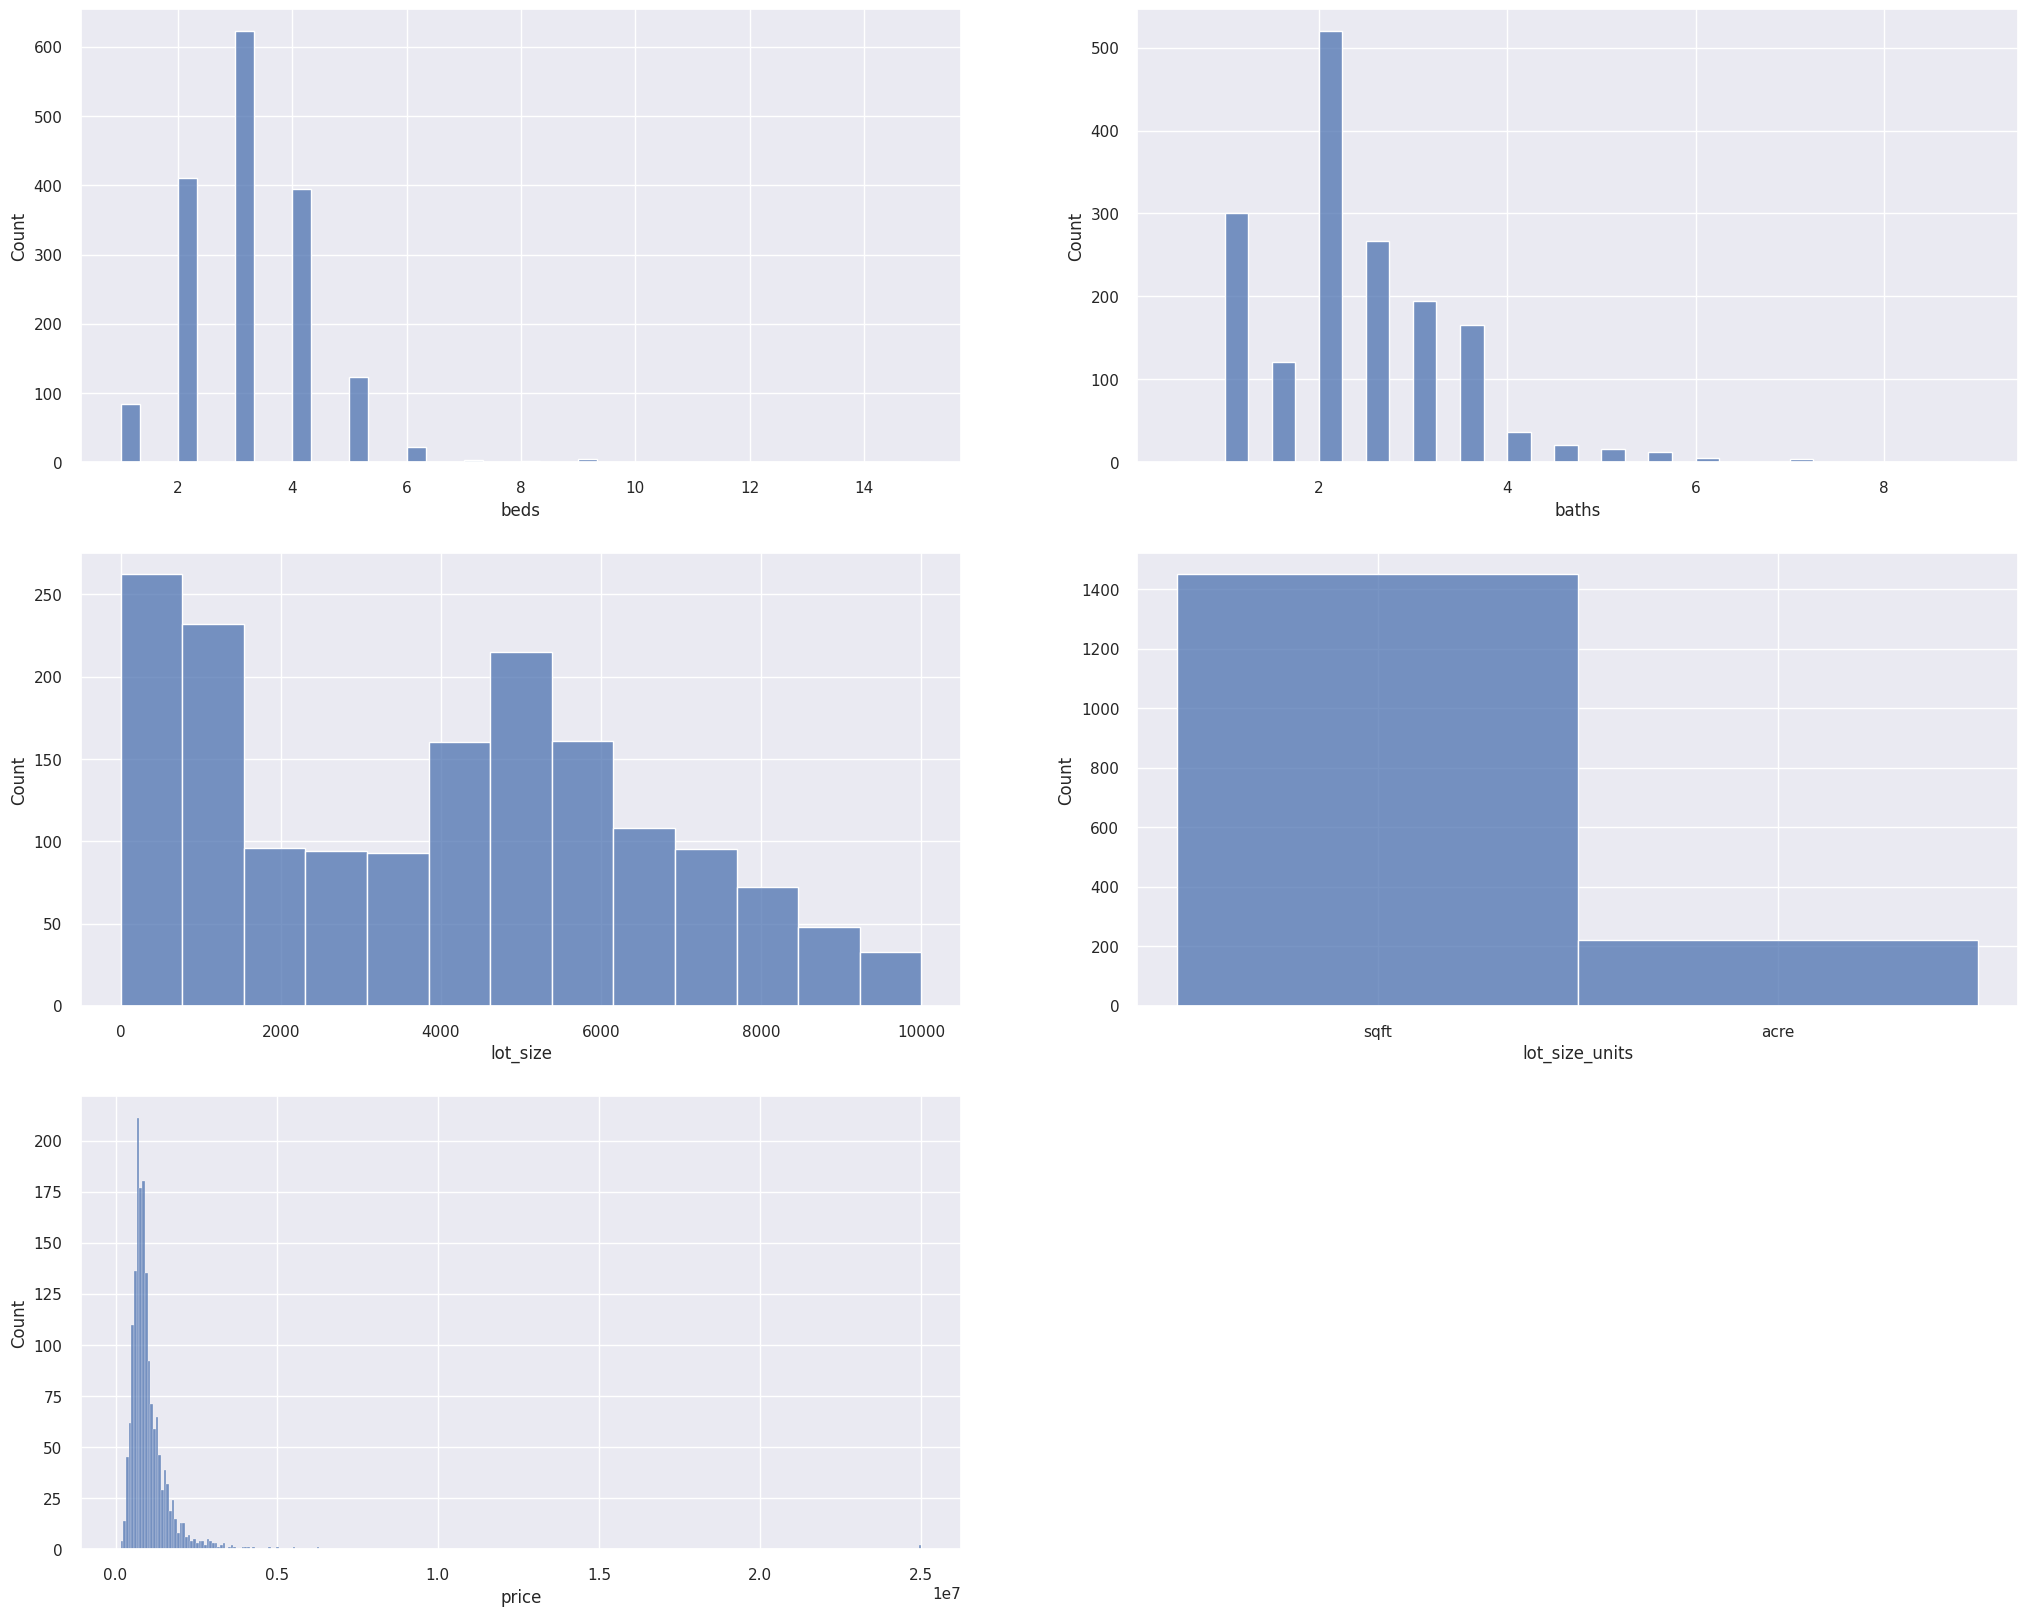

In [40]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(df['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(df['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(df['lot_size'], kde = False)

plt.subplot(3,2,4)
sns.histplot(df['lot_size_units'], kde = False)

plt.subplot(3,2,5)
sns.histplot(df['price'], kde = False)

<Axes: title={'center': 'Boxplot Beds'}, xlabel='beds'>

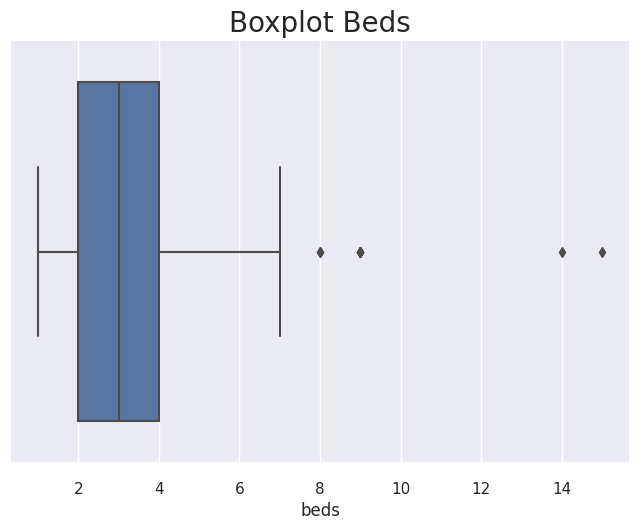

In [41]:

plt.title("Boxplot Beds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

<Axes: title={'center': 'Boxplot Beds Without Outliers'}, xlabel='beds'>

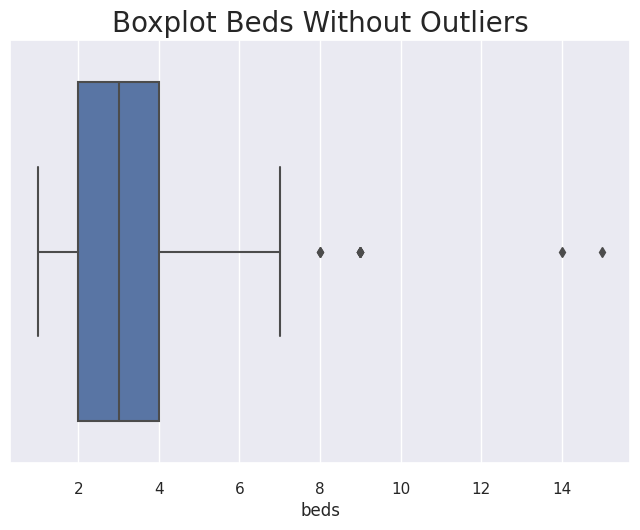

In [42]:
plt.title("Boxplot Beds Without Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

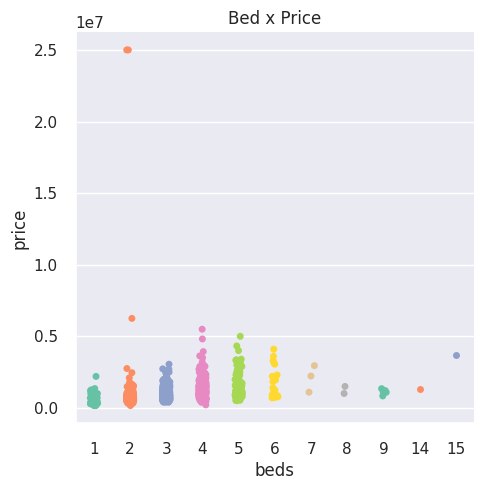

In [43]:
sns.catplot(x = "beds", y = "price", palette = "Set2", data = df).set(title='Bed x Price')

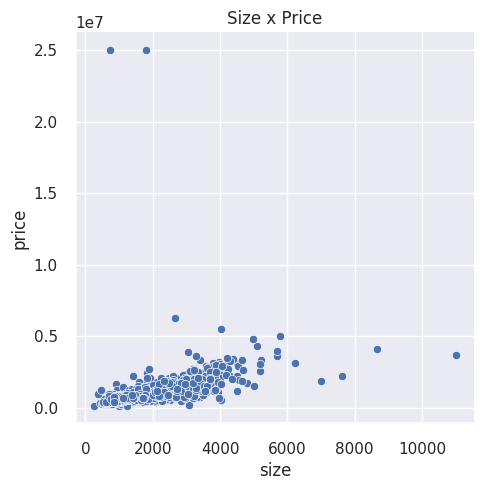

In [44]:
sns.relplot(x='size', y = 'price' , data = df).set(title='Size x Price')

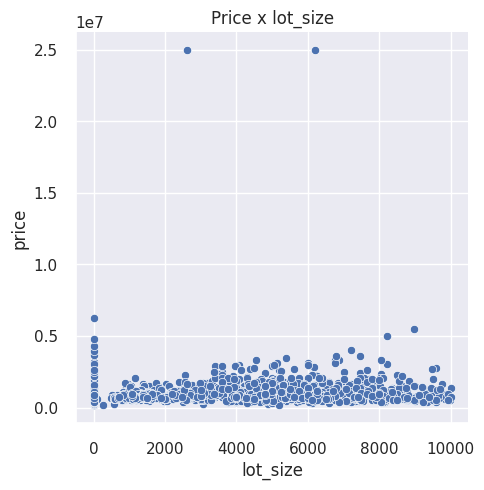

In [45]:
sns.relplot(x='lot_size', y = 'price' , data = df).set(title='Price x lot_size')

In [ ]:
#MODEL BUILDING

In [46]:
X = df.drop('price', axis = 1)

In [47]:
X = X.values

In [48]:
y = df['price']

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder_lot_size_units = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

In [51]:
X[:,4] = label_encoder_lot_size_units.fit_transform(X[:,4])
X[:,5] = label_encoder_zip_code.fit_transform(X[:,5])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.values.reshape(-1,1))

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)

In [55]:
X_train.shape, y_train.shape

((1168, 6), (1168, 1))

In [56]:
X_test.shape, y_test.shape

((501, 6), (501, 1))

In [58]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [59]:
lr_normal_score_train = lr_model.score(X_train, y_train)
lr_normal_score_train

0.22132385464927373

In [60]:
lr_normal_score_test = lr_model.score(X_test, y_test)
lr_normal_score_test

0.1325503565819116

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}


In [65]:
model = DecisionTreeRegressor()

In [66]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)

In [67]:
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [68]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  4
Algorithm:  absolute_error
Score:  0.46244880588758674
